In [79]:
%qtconsole

In [2]:
import numpy as np
import numbapro
from numbapro import *
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline
from sklearn.datasets import make_blobs

n_samples = 1e5
n_centers = 6
n_features = 2

n_samples = int(n_samples)

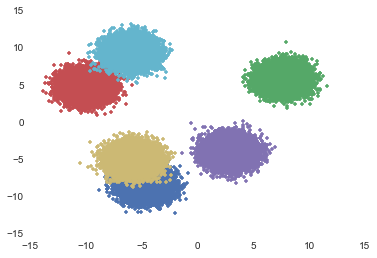

In [22]:
data, gt = make_blobs(n_samples, n_features, n_centers)

data = data.astype(np.float32)

fig1=plt.figure()
for l in np.unique(gt):
    l_data = gt == l
    plt.plot(data[l_data,0], data[l_data,1], '.')
plt.savefig('foo.eps', dpi=None, bbox_inches='tight')

In [23]:
type(fig1)

matplotlib.figure.Figure

In [32]:
import matplotlib.figure

In [34]:
isinstance(fig1,matplotlib.figure.Figure)

True

In [10]:
ls

BoruvkaUMinho/  EAC_toolbox/  hello           mst_seq.csv  od_gpu.csv
colors_gpu.csv  eid_gpu.csv   Horn/           MyML/        od_seq.csv
colors_seq.csv  eid_seq.csv   Kruskal SL/     nef_gpu.csv  README.md
datasets/       experiments/  LICENSE         nef_seq.csv  te_gpu.csv
deprecated/     fe_gpu.csv    MatchClusters/  nod_gpu.csv  te_seq.csv
dest_gpu.csv    fe_seq.csv    me_gpu.csv      nod_seq.csv  utils/
dest_seq.csv    foo.eps       me_seq.csv      notebooks/   weight_gpu.csv
dev_notes.md    foo.png       mst_gpu.csv     nv_gpu.csv   weight_seq.csv
doc/            fsknnv1/      mst_nvprof.log  nv_seq.csv


In [9]:
plt.savefig('foo.png', bbox_inches='tight')

In [67]:
import MyML.cluster.K_Means3 as myKM

In [80]:
reload(myKM)

<module 'MyML.cluster.K_Means3' from '/home/chiroptera/workspace/QCThesis/MyML/cluster/K_Means3.pyc'>

In [76]:
iters = 3
n_clusters = 100
init_seed = np.random.randint(0, n_samples, n_clusters)
init = data[init_seed]

estGPU = myKM.K_Means(n_clusters=n_clusters, mode='cuda', cuda_mem="manual", max_iter=iters, init=init)
estCPU = myKM.K_Means(n_clusters=n_clusters, mode='numpy', max_iter=iters, init=init)

estGPU2 = myKM.K_Means(n_clusters=n_clusters, mode='cuda', cuda_mem="manual", max_iter=iters, init=init)
estGPU2._centroid_mode="good_numba"

estCPU2 = myKM.K_Means(n_clusters=n_clusters, mode='numpy', max_iter=iters, init=init)
estCPU2._centroid_mode="good_numba"

estCPU3 = myKM.K_Means(n_clusters=n_clusters, mode='numba', max_iter=iters, init=init)
estCPU3._centroid_mode="good_numba"

estCPU4 = myKM.K_Means(n_clusters=n_clusters, mode='numba', max_iter=iters, init=init)
estCPU4._centroid_mode="good"

In [78]:
print estGPU.labels_
print estGPU2.labels_

print estCPU.labels_
print estCPU2.labels_
print estCPU3.labels_
print estCPU4.labels_

[28 77 86 ..., 85  5 18]
[28 77 86 ..., 85  5 18]
[28 77 86 ..., 85  5 18]
[28 77 86 ..., 85  5 18]
[28 77 86 ..., 85  5 18]
[28 77 86 ..., 85  5 18]


In [77]:
%time estGPU2.fit(data)
%time estGPU.fit(data)
%time estCPU.fit(data)
%time estCPU2.fit(data)
%time estCPU3.fit(data)
%time estCPU4.fit(data)

CPU times: user 117 ms, sys: 20.2 ms, total: 137 ms
Wall time: 136 ms
CPU times: user 245 ms, sys: 28.2 ms, total: 273 ms
Wall time: 274 ms
CPU times: user 1.41 s, sys: 0 ns, total: 1.41 s
Wall time: 1.41 s
CPU times: user 1.28 s, sys: 2.77 ms, total: 1.28 s
Wall time: 1.29 s
CPU times: user 249 ms, sys: 0 ns, total: 249 ms
Wall time: 249 ms
CPU times: user 391 ms, sys: 0 ns, total: 391 ms
Wall time: 390 ms


In [4]:
from numba import jit

In [91]:
@jit(nopython=True)
def test():
    a=np.empty((10,10))
    b = np.zeros((10,10))
    return a, b